# Predict the demand for biking

## Step 0: Importing libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Step 1: Reading the data

In [129]:
bikes=pd.read_csv('hour.csv')

In [130]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [131]:
bikes=bikes.drop(['casual','registered'],axis=1)

### We drop 'casual' and 'registered' because we already have 'cnt' which is the addition of the two.

In [132]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


## Step 2 : Prelim Analysis and Feature Selection

### Step 2.1 : Checking null or missing values

In [133]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Step 2.3:  Visualization of data using pandas histogram

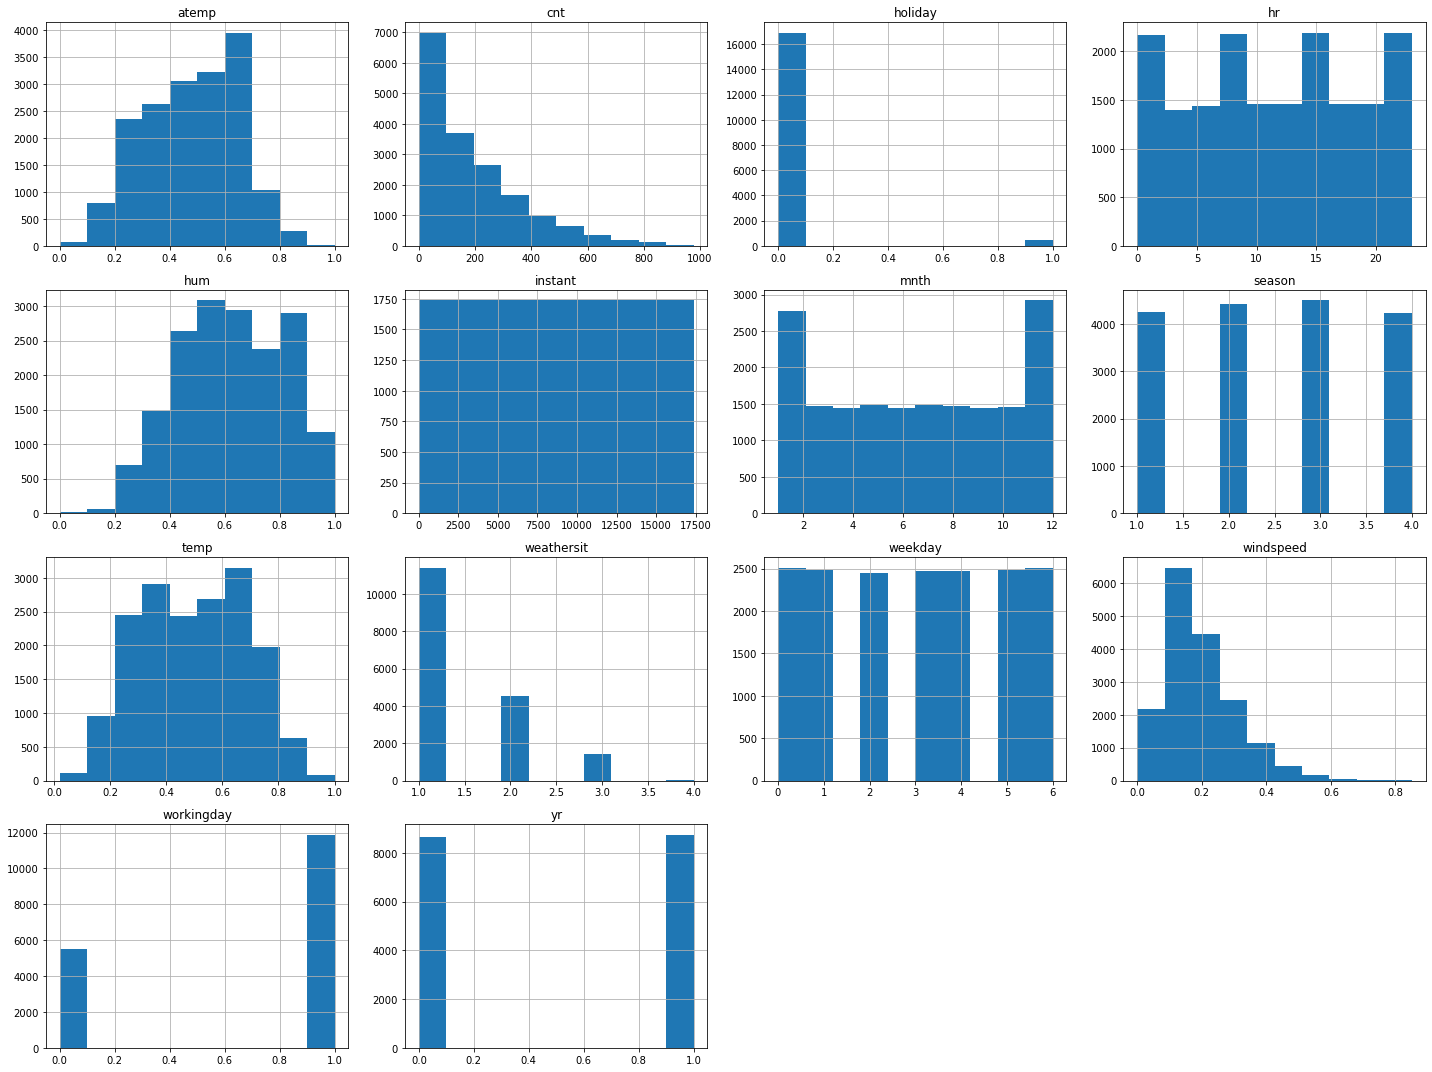

In [134]:
bikes.hist(rwidth=10)

plt.rcParams["figure.figsize"] = (30,20)

plt.tight_layout()

## Step 3: Visualizing the data in different forms 

### Step 3.1: For Continuous variables

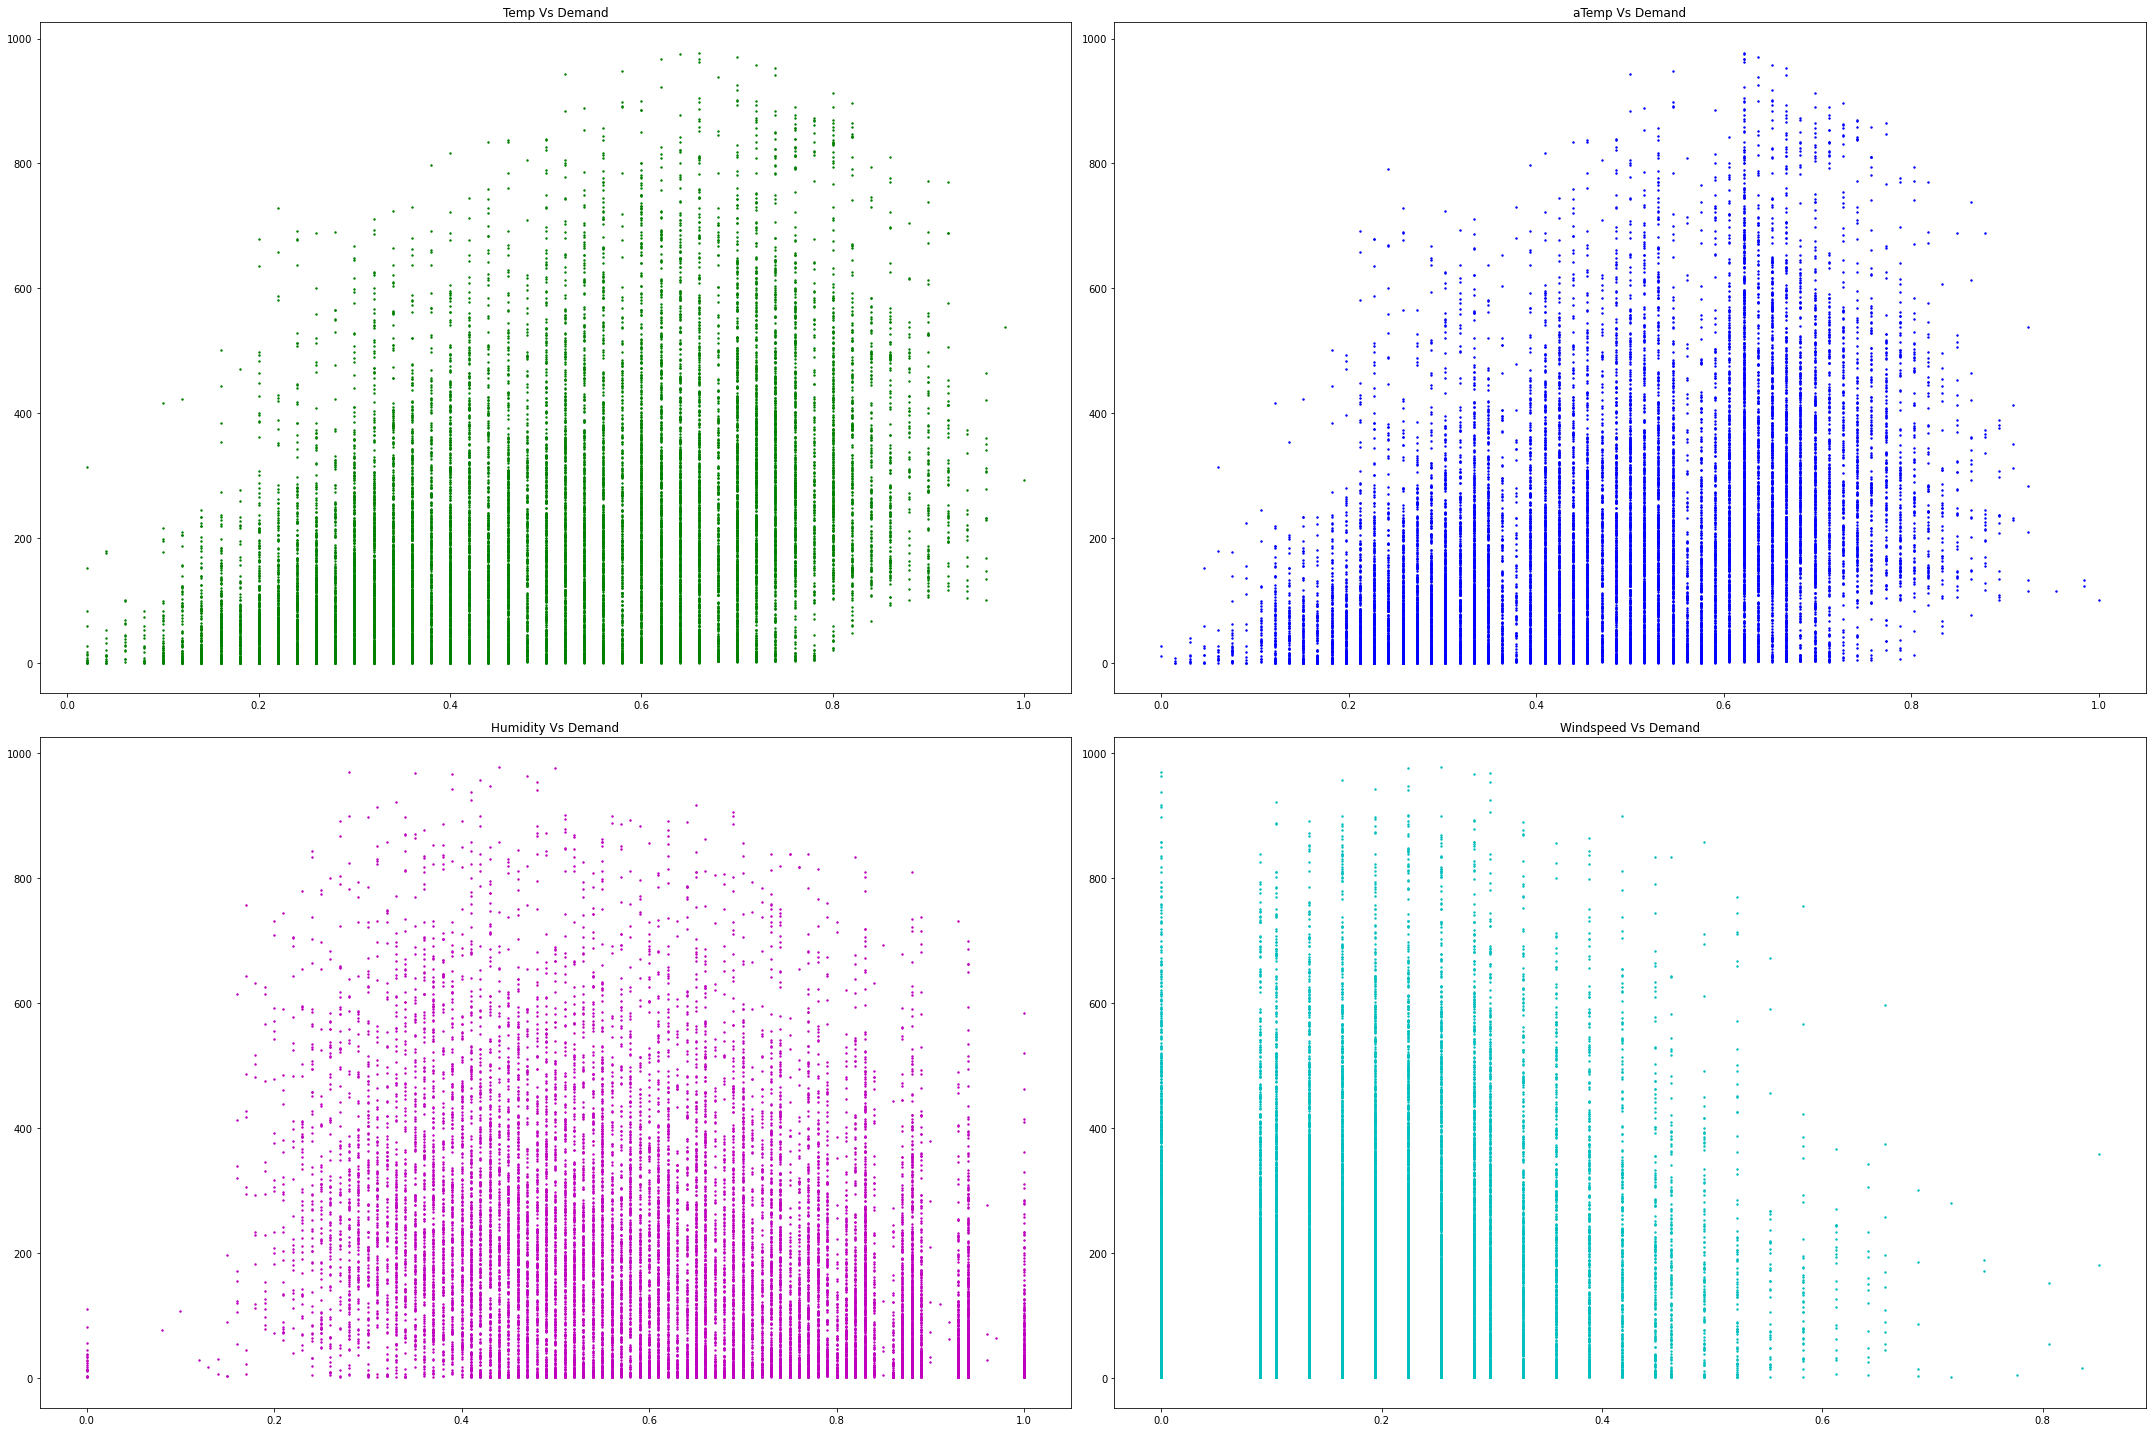

In [135]:
plt.subplot(2,2,1)

plt.title("Temp Vs Demand")

plt.scatter(bikes['temp'],bikes['cnt'],s=2,c='g')

plt.subplot(2,2,2)

plt.title("aTemp Vs Demand")

plt.scatter(bikes['atemp'],bikes['cnt'],s=2,c='b')

plt.subplot(2,2,3)

plt.title("Humidity Vs Demand")

plt.scatter(bikes['hum'],bikes['cnt'],s=2,c='m')

plt.subplot(2,2,4)

plt.title("Windspeed Vs Demand")

plt.scatter(bikes['windspeed'],bikes['cnt'],s=2,c='c')

plt.rcParams["figure.figsize"] = (10,10)

plt.tight_layout()


plt.show()

### - By visualizing we can say that Temp and aTemp may have a high correlation
### - We can also say that with increasing winndspeed after a certain point the demand may decrease.

### Step 3.2: For Categorical variables

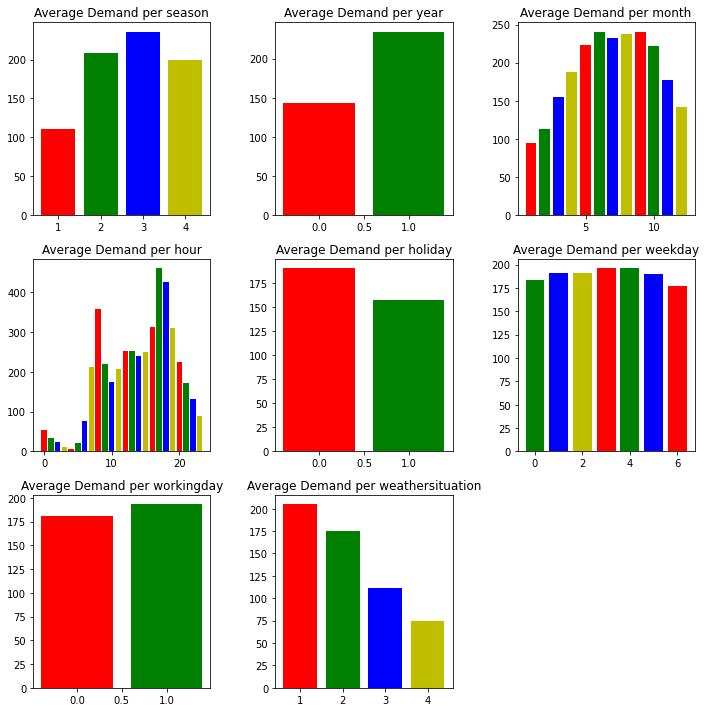

In [136]:
colors=['r','g','b','y']

plt.subplot(3,3,1)

plt.title('Average Demand per season')

cat_list=bikes['season'].unique() #gets us unique values from column season

cat_avg=bikes.groupby('season').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,2)

plt.title('Average Demand per year')

cat_list=bikes['yr'].unique() #gets us unique values from column year

cat_avg=bikes.groupby('yr').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,3)

plt.title('Average Demand per month')

cat_list=bikes['mnth'].unique() #gets us unique values from column month

cat_avg=bikes.groupby('mnth').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,4)

plt.title('Average Demand per hour')

cat_list=bikes['hr'].unique() #gets us unique values from column hour

cat_avg=bikes.groupby('hr').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,5)

plt.title('Average Demand per holiday')

cat_list=bikes['holiday'].unique() #gets us unique values from column holiday

cat_avg=bikes.groupby('holiday').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,6)

plt.title('Average Demand per weekday')

cat_list=bikes['weekday'].unique() #gets us unique values from column weekday

cat_avg=bikes.groupby('weekday').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,7)

plt.title('Average Demand per workingday')

cat_list=bikes['workingday'].unique() #gets us unique values from column workingday

cat_avg=bikes.groupby('workingday').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.subplot(3,3,8)

plt.title('Average Demand per weathersituation')

cat_list=bikes['weathersit'].unique() #gets us unique values from column weathersituation

cat_avg=bikes.groupby('weathersit').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.rcParams["figure.figsize"] = (20,15)

plt.tight_layout()






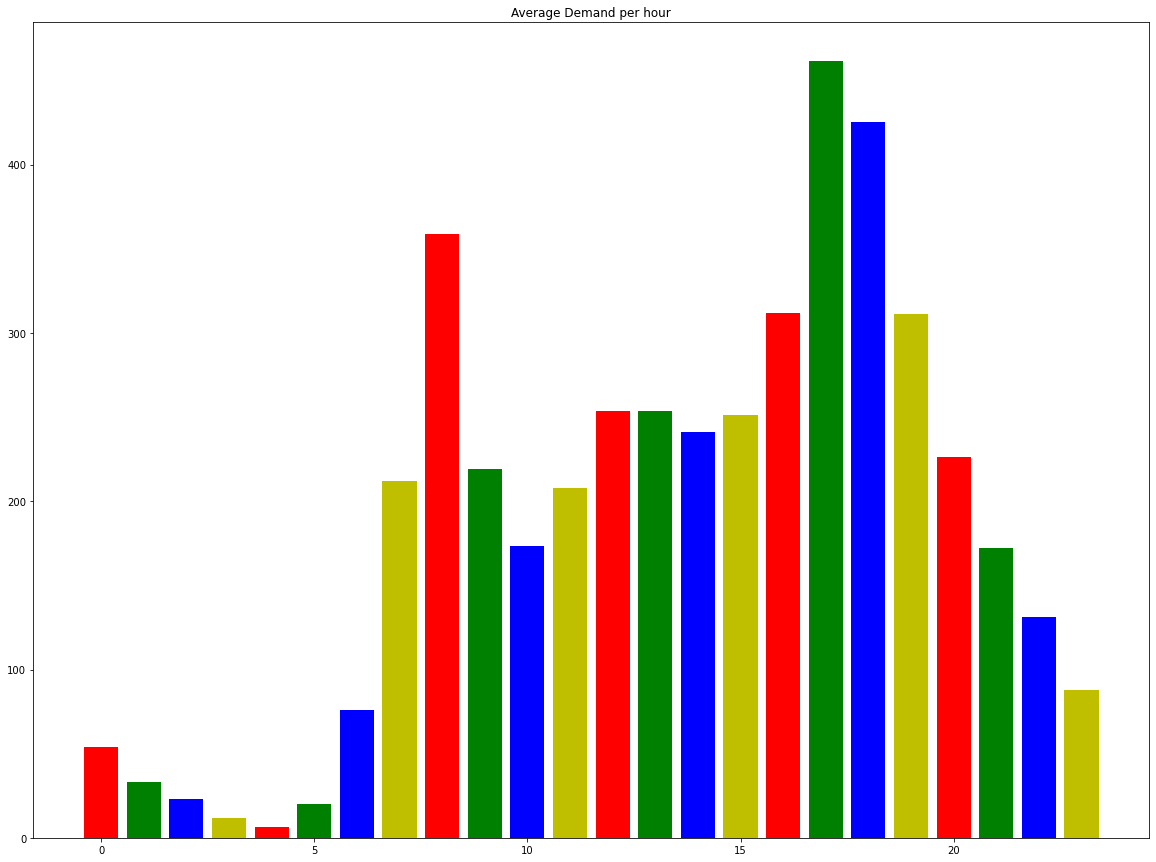

In [137]:
plt.title('Average Demand per hour')

cat_list=bikes['hr'].unique() #gets us unique values from column hour

cat_avg=bikes.groupby('hr').mean()['cnt']

plt.bar(cat_list,cat_avg,color=colors)

plt.show()

### - We can say the bikes should be parked near public transports around 7:00 hours
### - And near offices aroud 17:00 hours

## Summarization of Data visulatization
## - Demand is not normally distributed
## - Temperature and Demand appears to have direct correlation
## - The plot for temp and atemp is almost identical plot
## - Humidity and Windspeed affect demand but need more statistical analysis

### Step 3.3: EDA

In [138]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [139]:
bikes['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

## Step 4: Check for Multiple Linear Regression Assumption

### Step 4.1 : Checking for correlation

In [140]:
corr=bikes.corr()

corr.style.background_gradient(cmap=plt.cm.Reds)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772


## Step 5: Drop irrelevant features

### We are dropping 'atemp' coz it violates the multicollinearity


In [141]:
bikes=bikes.drop(['atemp','instant','dteday'],axis=1)

In [142]:
bikes

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


### Step 5.1: Check for autocorrelation in demand using the acorr plot

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.4547474 , 0.4704958 , 0.49622864, 0.4940412 , 0.46795967,
        0.4773207 , 0.526758  , 0.59145766, 0.6520162 , 0.7151964 ,
        0.8059114 , 0.92531085, 1.        , 0.92531073, 0.8059114 ,
        0.7151964 , 0.6520162 , 0.59145766, 0.526758  , 0.4773207 ,
        0.46795967, 0.4940412 , 0.49622864, 0.47049585, 0.4547474 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1a4750685b0>)

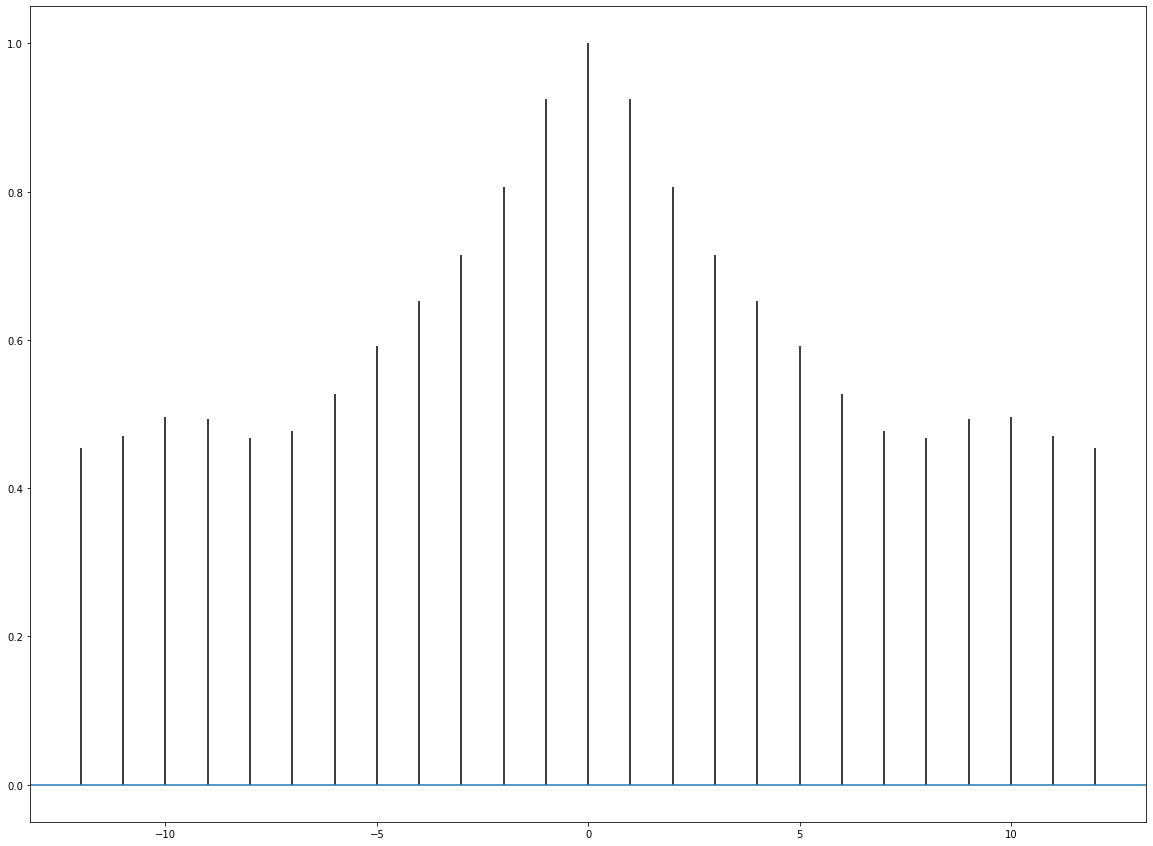

In [143]:
df1=pd.to_numeric(bikes['cnt'],downcast='float') #convert to float

plt.acorr(df1,maxlags=12)

### - High autocorrelation in demand feature

## Step 6: Create or modify new features

### Step 6.1 Log normalize the variables

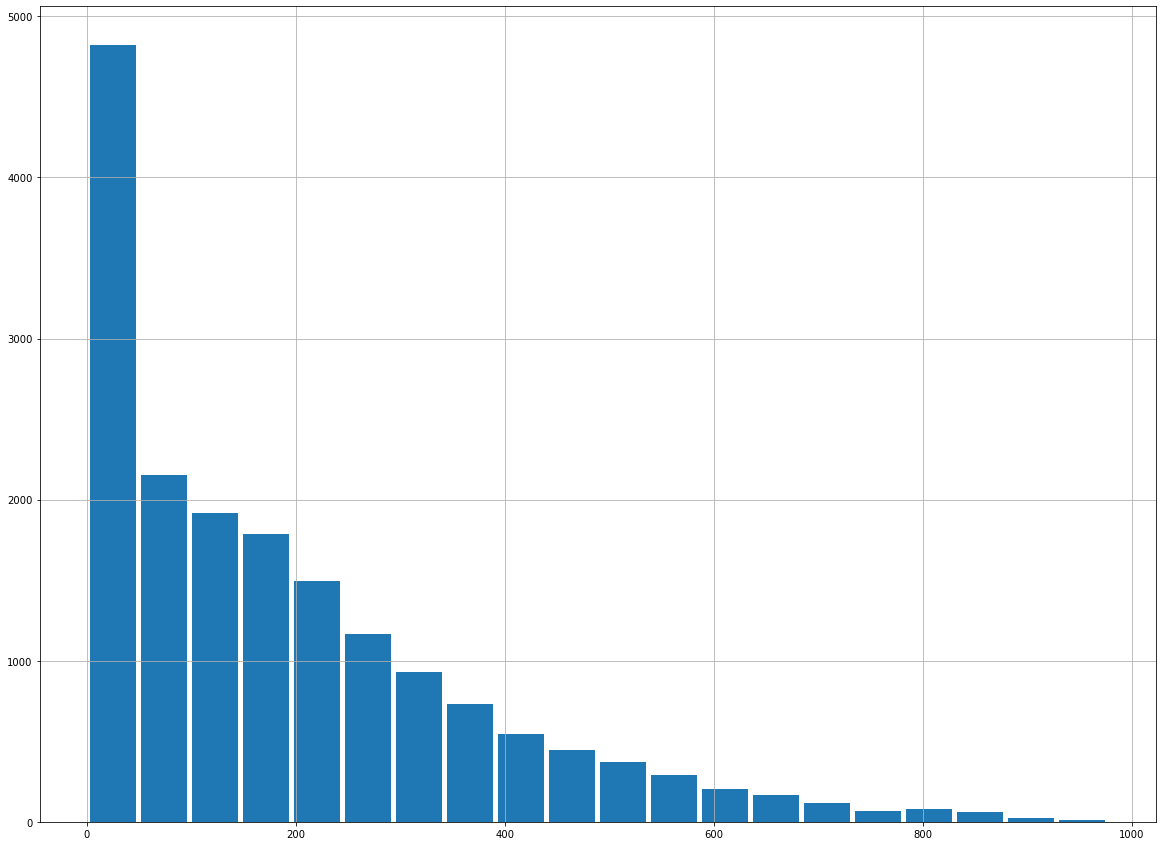

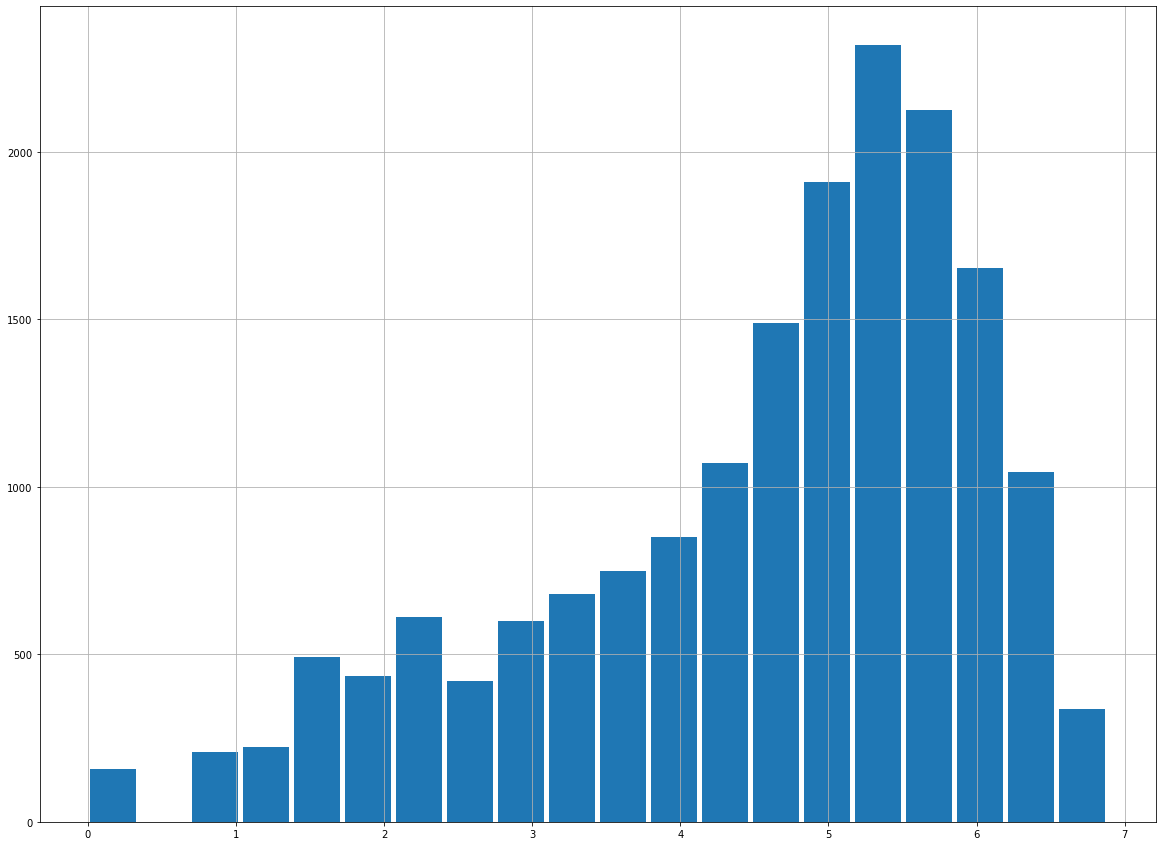

In [144]:
import numpy as np

df2=np.log(df1)

plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)



In [145]:
bikes['cnt']=np.log(bikes['cnt'])

In [146]:
bikes

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,4.779123
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,4.488636
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,4.499810
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,4.110874


### Step 6.2 Autocorrelation in demand column

In [147]:
t_1=bikes['cnt'].shift(+1).to_frame()
t_1.columns=['t-1']

t_2=bikes['cnt'].shift(+1).to_frame()
t_2.columns=['t-2']

t_3=bikes['cnt'].shift(+1).to_frame()
t_3.columns=['t-3']

bikes_lag=pd.concat([bikes,t_1,t_2,t_3],axis=1)



In [148]:
bikes_lag

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,t-1,t-2,t-3
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,2.772589,NaN,NaN,NaN
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,3.688879,2.772589,2.772589,2.772589
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,3.465736,3.688879,3.688879,3.688879
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,2.564949,3.465736,3.465736,3.465736
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,0.000000,2.564949,2.564949,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,4.779123,4.804021,4.804021,4.804021
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,4.488636,4.779123,4.779123,4.779123
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,4.499810,4.488636,4.488636,4.488636
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,4.110874,4.499810,4.499810,4.499810


## The new 3 columns  will be required to predict the demand along with others

### Dropping NAN rows

In [149]:
bikes_lag=bikes_lag.dropna()

In [150]:
bikes_lag

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,t-1,t-2,t-3
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,3.688879,2.772589,2.772589,2.772589
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,3.465736,3.688879,3.688879,3.688879
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,2.564949,3.465736,3.465736,3.465736
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,0.000000,2.564949,2.564949,2.564949
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,4.779123,4.804021,4.804021,4.804021
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,4.488636,4.779123,4.779123,4.779123
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,4.499810,4.488636,4.488636,4.488636
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,4.110874,4.499810,4.499810,4.499810


## Step 7 : Create dummy variables and drop first to avoid dummy variables trap

In [151]:
bikes_lag.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt           float64
t-1           float64
t-2           float64
t-3           float64
dtype: object

In [152]:
# the column need to be of object type for dummy variables

bikes_lag['season']=bikes_lag['season'].astype('category')

bikes_lag['yr']=bikes_lag['yr'].astype('category')

bikes_lag['mnth']=bikes_lag['mnth'].astype('category')

bikes_lag['hr']=bikes_lag['hr'].astype('category')

bikes_lag['holiday']=bikes_lag['holiday'].astype('category')

bikes_lag['weekday;']=bikes_lag['weekday'].astype('category')

bikes_lag['workingday']=bikes_lag['workingday'].astype('category')

bikes_lag['weathersit']=bikes_lag['weathersit'].astype('category')


<ipython-input-152-1e86e68d10c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_lag['season']=bikes_lag['season'].astype('category')
<ipython-input-152-1e86e68d10c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_lag['yr']=bikes_lag['yr'].astype('category')
<ipython-input-152-1e86e68d10c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [153]:
dummy_df=pd.get_dummies(bikes_lag,drop_first=True)

In [154]:
dummy_df

,weekday,temp,hum,windspeed,cnt,t-1,t-2,t-3,season_2,season_3,...,workingday_1,weathersit_2,weathersit_3,weathersit_4,weekday;_1,weekday;_2,weekday;_3,weekday;_4,weekday;_5,weekday;_6
1,6,0.22,0.80,0.0000,3.688879,2.772589,2.772589,2.772589,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,0.22,0.80,0.0000,3.465736,3.688879,3.688879,3.688879,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,0.24,0.75,0.0000,2.564949,3.465736,3.465736,3.465736,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,0.24,0.75,0.0000,0.000000,2.564949,2.564949,2.564949,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.24,0.75,0.0896,0.000000,0.000000,0.000000,0.000000,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0.26,0.60,0.1642,4.779123,4.804021,4.804021,4.804021,0,0,...,1,1,0,0,1,0,0,0,0,0
17375,1,0.26,0.60,0.1642,4.488636,4.779123,4.779123,4.779123,0,0,...,1,1,0,0,1,0,0,0,0,0
17376,1,0.26,0.60,0.1642,4.499810,4.488636,4.488636,4.488636,0,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0.26,0.56,0.1343,4.110874,4.499810,4.499810,4.499810,0,0,...,1,0,0,0,1,0,0,0,0,0


## Step 8: Test train data split

    

### Since, the target variable is time dependent so Autocollinearity comes in place

In [155]:
Y=bikes_lag[['cnt']]
X=bikes_lag.drop(['cnt'],axis=1)

In [156]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,t-1,t-2,t-3,weekday;
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,2.772589,2.772589,2.772589,6
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,3.688879,3.688879,3.688879,6
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,3.465736,3.465736,3.465736,6
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,2.564949,2.564949,2.564949,6
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,0.000000,0.000000,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,4.804021,4.804021,4.804021,1
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,4.779123,4.779123,4.779123,1
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,4.488636,4.488636,4.488636,1
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,4.499810,4.499810,4.499810,1


In [157]:
Y

,cnt
1,3.688879
2,3.465736
3,2.564949
4,0.000000
5,0.000000
...,...
17374,4.779123
17375,4.488636
17376,4.499810
17377,4.110874


### Creating training set at 70% of total rows

In [158]:
tr_size=0.7*len(X)

In [159]:
tr_size

12164.599999999999

In [160]:
tr_size=int(tr_size)

In [161]:
tr_size

12164

In [162]:
X_train=X.values[0:tr_size]
X_test=X.values[tr_size:len(X)]

In [163]:
Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size:len(Y)]

## Step 9 : Fit and Score the model

### Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lr=LinearRegression()

In [166]:
lr.fit(X_train,Y_train)

LinearRegression()

In [167]:
y_pred=lr.predict(X_test)

In [168]:
y_pred

array([[4.31800486],
       [4.13048981],
       [3.70498691],
       ...,
       [4.6128818 ],
       [4.64081893],
       [4.33233308]])

In [169]:
Y

,cnt
1,3.688879
2,3.465736
3,2.564949
4,0.000000
5,0.000000
...,...
17374,4.779123
17375,4.488636
17376,4.499810
17377,4.110874


In [170]:
from sklearn.metrics import r2_score
print('R-square score',r2_score(Y_test,y_pred))

R-square score 0.8035286602214663


In [171]:
adj_rsquares= 1 - (1 - r2_score(Y_test, y_pred)) * ((len(Y_test) - 1)/(len(Y_test)-X_train.shape[1]-1))

In [172]:
print('Adjusted R-squared score',adj_rsquares)

Adjusted R-squared score 0.8029616979096775


In [173]:
from sklearn.metrics import mean_squared_error
import math

In [174]:
rmse=math.sqrt(mean_squared_error(Y_test,y_pred))

In [175]:
print('RMSE',rmse)

RMSE 0.6324612389689543


### Calculate RMSLE

In [176]:
y_test_e=[]

y_pred_e=[]

for i in range(0,len(Y_test)):
    y_test_e.append(math.exp(Y_test[i]))
    y_pred_e.append(math.exp(y_pred[i]))
    

In [177]:
# Calculate the sum

log_sq_sum=0.0

for i in range(0,len(y_test_e)):
    log_a=math.log(y_test_e[i]+1)
    log_p=math.log(y_pred_e[i]+1)
    log_diff=(log_a-log_p)**2
    log_sq_sum=log_sq_sum+log_diff
    

In [178]:
rmsle=math.sqrt(log_sq_sum/len(Y_test))

In [179]:
print('RMSLE',rmsle)

RMSLE 0.6063272329518606


### Feature Selection for Linear Regression

In [180]:
bikes_lag1=bikes_lag.drop(['hum','weathersit'],axis=1)

### We are dropping 'hum' and 'weathersit' because they have very low correlation with 'cnt'

In [181]:
Y1=bikes_lag1[['cnt']]
X1=bikes_lag1.drop(['cnt'],axis=1)

In [182]:
X1

,season,yr,mnth,hr,holiday,weekday,workingday,temp,windspeed,t-1,t-2,t-3,weekday;
1,1,0,1,1,0,6,0,0.22,0.0000,2.772589,2.772589,2.772589,6
2,1,0,1,2,0,6,0,0.22,0.0000,3.688879,3.688879,3.688879,6
3,1,0,1,3,0,6,0,0.24,0.0000,3.465736,3.465736,3.465736,6
4,1,0,1,4,0,6,0,0.24,0.0000,2.564949,2.564949,2.564949,6
5,1,0,1,5,0,6,0,0.24,0.0896,0.000000,0.000000,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,0.26,0.1642,4.804021,4.804021,4.804021,1
17375,1,1,12,20,0,1,1,0.26,0.1642,4.779123,4.779123,4.779123,1
17376,1,1,12,21,0,1,1,0.26,0.1642,4.488636,4.488636,4.488636,1
17377,1,1,12,22,0,1,1,0.26,0.1343,4.499810,4.499810,4.499810,1


In [183]:
Y1

,cnt
1,3.688879
2,3.465736
3,2.564949
4,0.000000
5,0.000000
...,...
17374,4.779123
17375,4.488636
17376,4.499810
17377,4.110874


## Training and Running the linear regression after dropping 2 features

In [184]:
tr_size1=0.7*len(X1)
tr_size1=int(tr_size1)

In [185]:
X1_train=X1.values[0:tr_size1]
X1_test=X1.values[tr_size1:len(X1)]

In [186]:
Y1_train=Y1.values[0:tr_size1]
Y1_test=Y1.values[tr_size1:len(Y1)]

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
lr1=LinearRegression()
lr1.fit(X1_train,Y1_train)
y_pred1=lr1.predict(X1_test)

In [189]:
from sklearn.metrics import r2_score
print('R-square',r2_score(Y1_test,y_pred1))

R-square 0.8028982197635095


In [190]:
adj_rsquares= 1 - (1 - r2_score(Y1_test, y_pred1)) * ((len(Y1_test) - 1)/(len(Y1_test)-X1_train.shape[1]-1))

In [191]:
print('Adjusted R-squared',adj_rsquares)

Adjusted R-squared 0.8024054653129182


In [192]:
rmse1=math.sqrt(mean_squared_error(Y1_test,y_pred1))

In [193]:
print('RMSE',rmse1)

RMSE 0.633475152254183


In [194]:
y1_test_e=[]

y1_pred_e=[]

for i in range(0,len(Y1_test)):
    y1_test_e.append(math.exp(Y1_test[i]))
    y1_pred_e.append(math.exp(y_pred1[i]))
    

In [195]:
log_sq_sum1=0.0

for i in range(0,len(y1_test_e)):
    log_a1=math.log(y1_test_e[i]+1)
    log_p1=math.log(y1_pred_e[i]+1)
    log_diff1=(log_a1-log_p1)**2
    log_sq_sum1=log_sq_sum1+log_diff1    

In [196]:
rmsle1=math.sqrt(log_sq_sum1/len(Y1_test))

In [197]:
print('RMSLE',rmsle1)

RMSLE 0.6073794805931177


##  Random Forest regressor

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
rf=RandomForestRegressor(n_estimators=500,random_state=1234)

In [200]:
rf.fit(X_train,Y_train)

<ipython-input-200-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=500, random_state=1234)

In [201]:
yrf_pred=rf.predict(X_test)

In [202]:
from sklearn.metrics import r2_score
print('R-Squared',r2_score(Y_test,yrf_pred))

R-Squared 0.955730363044033


In [203]:
adj_rsquares= 1 - (1 - r2_score(Y_test, yrf_pred)) * ((len(Y_test) - 1)/(len(Y_test)-X_train.shape[1]-1))

In [204]:
print('Adjusted R-Squared',adj_rsquares)

Adjusted R-Squared 0.9556026130335791


In [205]:
rmserf=math.sqrt(mean_squared_error(Y_test,yrf_pred))
print('RMSE',rmserf)

RMSE 0.30021838982888277


In [206]:
y_test_e=[]

y_pred_e=[]

for i in range(0,len(Y_test)):
    y_test_e.append(math.exp(Y_test[i]))
    y_pred_e.append(math.exp(yrf_pred[i]))
    

In [207]:
log_sq_sum=0.0

for i in range(0,len(y_test_e)):
    log_a=math.log(y_test_e[i]+1)
    log_p=math.log(y_pred_e[i]+1)
    log_diff=(log_a-log_p)**2
    log_sq_sum=log_sq_sum+log_diff    

In [208]:
rmslerf=math.sqrt(log_sq_sum/len(Y_test))
print('RMSLE',rmslerf)

RMSLE 0.28025649115009116
